In [63]:
import pandas as pd 
import matplotlib.pyplot as plot
import numpy

In [64]:
dataframe=pd.read_csv(r'C:\checkpoint25\Heart_Disease_Data.csv', sep=",")

In [65]:
dataframe["pred_attribute"].replace(inplace=True, value=[1, 1, 1, 1], to_replace=[1, 2, 3, 4])
dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [66]:
dataframe.shape

(303, 14)

In [67]:
dataframe.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [68]:
dataframe.isnull().values.any()

False

Text(0, 0.5, 'Number of Patients')

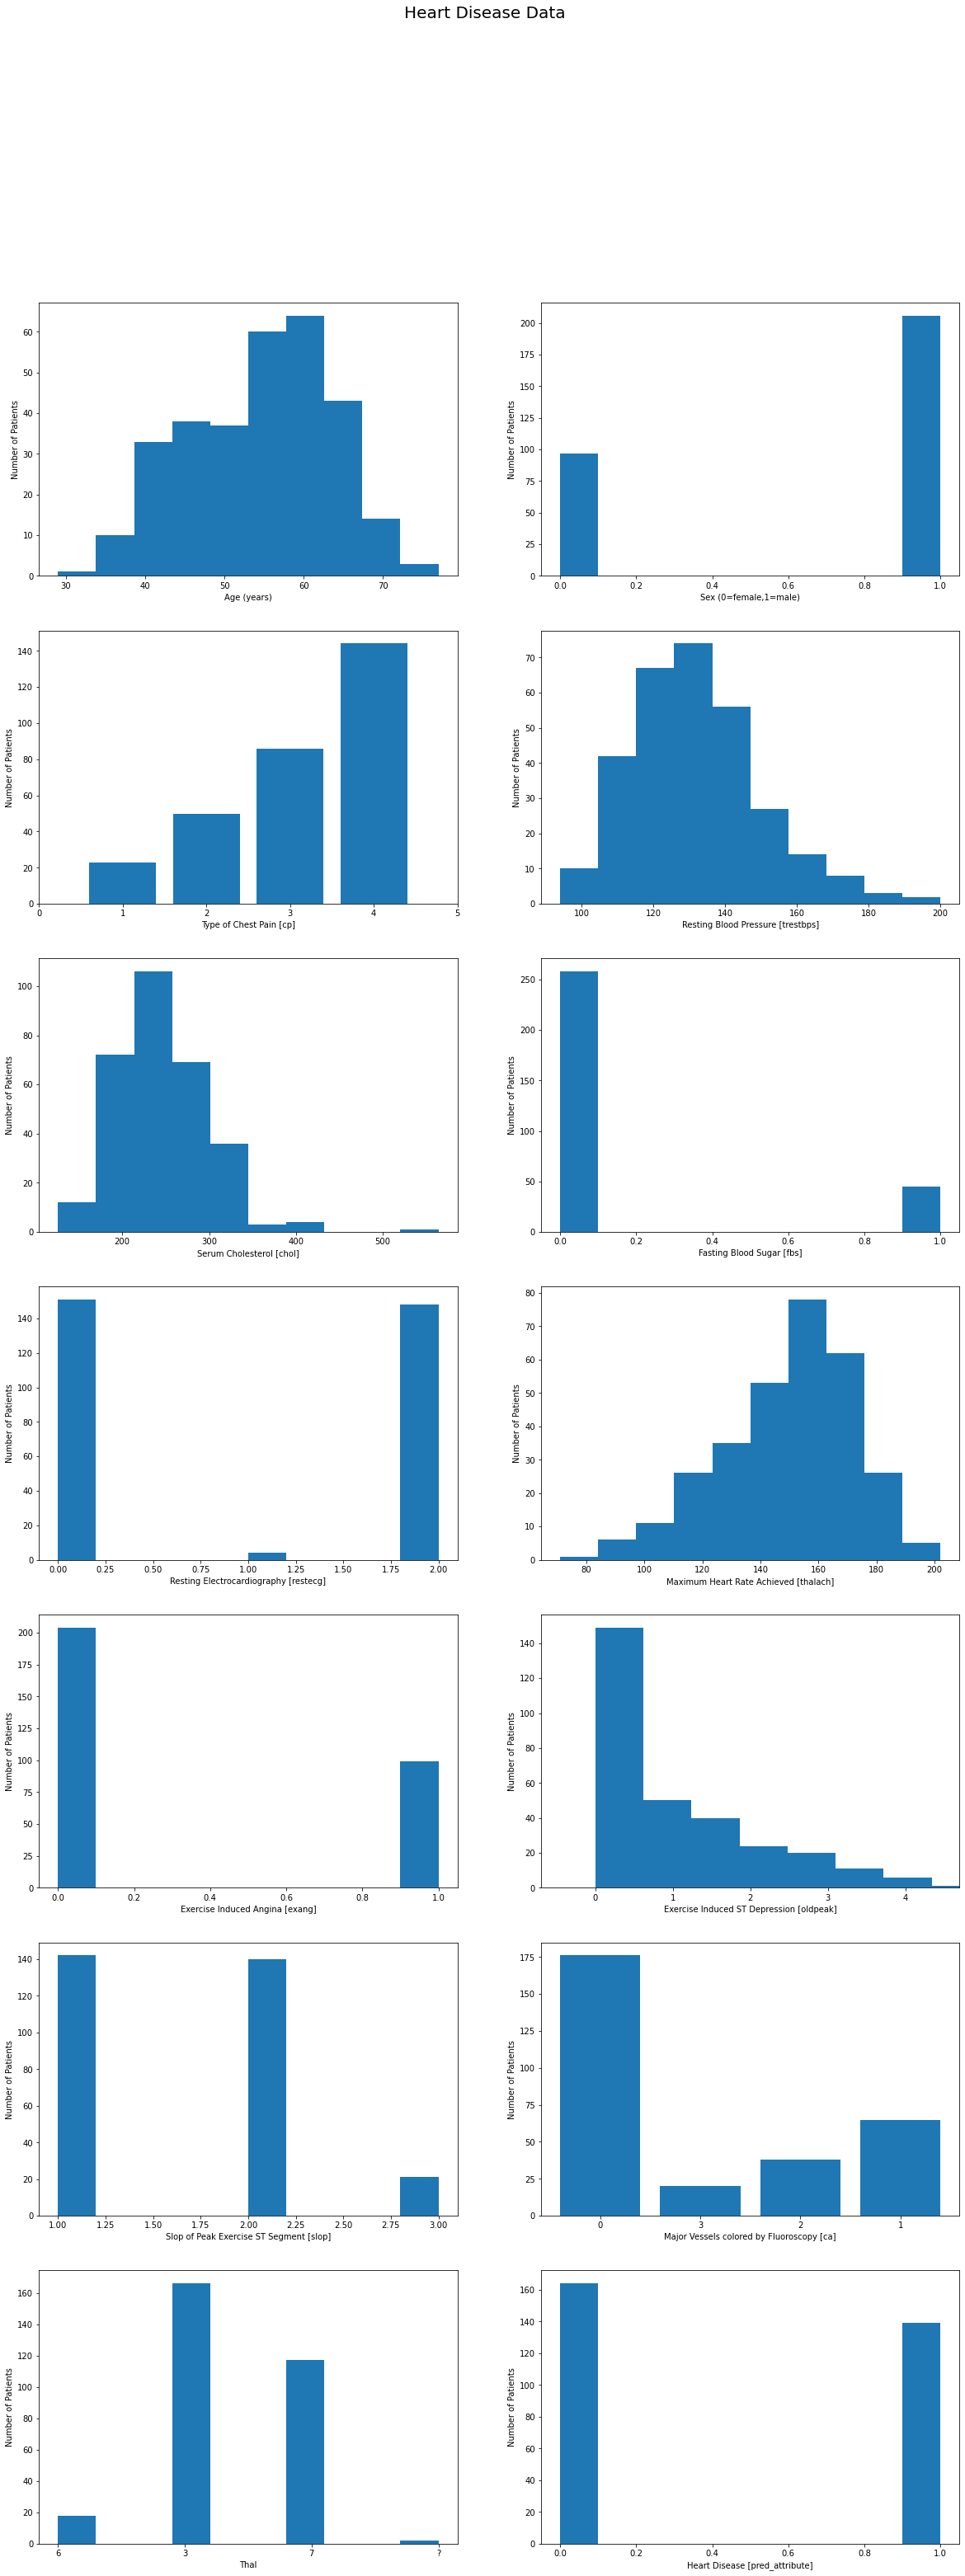

In [85]:
figure, axes = plot.subplots(nrows=7, ncols=2, figsize=(20,50) )
plot.suptitle("Heart Disease Data", fontsize=20)

axes[0,0].hist(dataframe.age)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylabel("Number of Patients")

axes[0,1].hist(dataframe.sex)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].set_ylabel("Number of Patients")

axes[1,0].hist(dataframe.cp, bins=4, range=(0.5,4.5), rwidth=0.80)
axes[1,0].set_xlim(0.0,5.0)
axes[1,0].set_xlabel("Type of Chest Pain [cp]")
axes[1,0].set_ylabel("Number of Patients")

axes[1,1].hist(dataframe.trestbps)
axes[1,1].set_xlabel("Resting Blood Pressure [trestbps]")
axes[1,1].set_ylabel("Number of Patients")

axes[2,0].hist(dataframe.chol)
axes[2,0].set_xlabel("Serum Cholesterol [chol]")
axes[2,0].set_ylabel("Number of Patients")

axes[2,1].hist(dataframe.fbs)
axes[2,1].set_xlabel("Fasting Blood Sugar [fbs]")
axes[2,1].set_ylabel("Number of Patients")
axes[3,0].hist(dataframe.restecg)
axes[3,0].set_xlabel("Resting Electrocardiography [restecg]")
axes[3,0].set_ylabel("Number of Patients")

axes[3,1].hist(dataframe.thalach)
axes[3,1].set_xlabel("Maximum Heart Rate Achieved [thalach]")
axes[3,1].set_ylabel("Number of Patients")

axes[4,0].hist(dataframe.exang)
axes[4,0].set_xlabel("Exercise Induced Angina [exang]")
axes[4,0].set_ylabel("Number of Patients")

axes[4,1].hist(dataframe.oldpeak)
axes[4,1].set_xlabel("Exercise Induced ST Depression [oldpeak]")
axes[4,1].set_ylabel("Number of Patients")

axes[5,0].hist(dataframe.slop)
axes[5,0].set_xlabel("Slop of Peak Exercise ST Segment [slop]")
axes[5,0].set_ylabel("Number of Patients")

axes[5,1].hist(dataframe.ca,bins=4,range=(-0.5,3.5),rwidth=0.8)
axes[4,1].set_xlim(-0.7,4.7)
axes[5,1].set_xlabel("Major Vessels colored by Fluoroscopy [ca]")
axes[5,1].set_ylabel("Number of Patients")

axes[6,0].hist(dataframe.thal)
axes[6,0].set_xlabel("Thal")
axes[6,0].set_ylabel("Number of Patients")

axes[6,1].hist(dataframe.pred_attribute)

axes[6,1].set_xlabel("Heart Disease [pred_attribute]")
axes[6,1].set_ylabel("Number of Patients")

In [70]:
predictions = dataframe.pred_attribute
features = dataframe.drop('pred_attribute', axis=1)

In [71]:
print("Cleveland dataset now has {} data points with {} variables each.".format(*dataframe.shape))

Cleveland dataset now has 303 data points with 14 variables each.


In [72]:
dataframe.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,pred_attribute
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.424510


In [73]:
def plot_correlation(dataframe, size=10):
    corr = dataframe.corr() # Data Frame correlation function
    figure, axes = plot.subplots(figsize=(size, size))
    axes.matshow(corr) # Color code the rectangles by correlation value
    plot.xticks(range(len(corr.columns)), corr.columns) # Draw x tick marks
    plot.yticks(range(len(corr.columns)), corr.columns) # Draw y tick marks

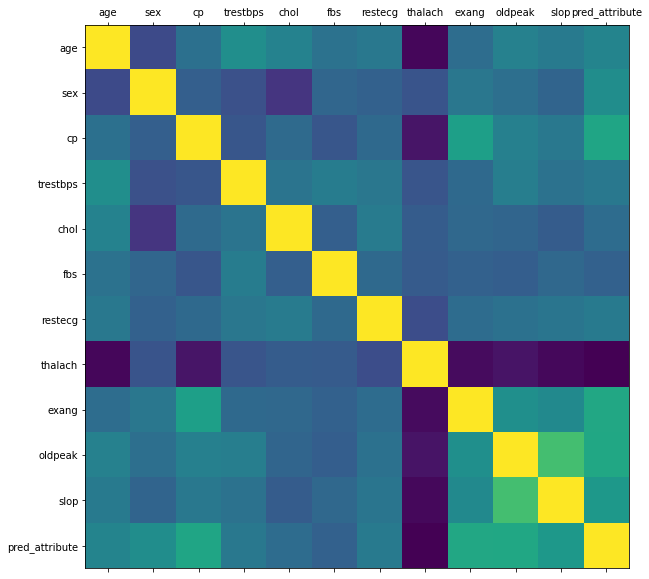

In [74]:
plot_correlation(dataframe)

In [105]:
dataframe=dataframe[dataframe['thal']!='?']
dataframe=dataframe[dataframe['ca']!='?']

In [106]:
dataframe['thal'].value_counts()

3    164
7    115
6     18
Name: thal, dtype: int64

In [107]:
dataframe.dropna(inplace=True, axis=0, how="any")
X=dataframe.loc[:, "age":"thal" ]
Y=dataframe["pred_attribute"]

In [108]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [110]:
freqs = pd.DataFrame({ "Training dataset": Y_train.value_counts().tolist(), "Test dataset":Y_test.value_counts().tolist(), "Total": Y.value_counts().tolist()}, index=["Healthy", "Sick"])
freqs[["Training dataset", "Test dataset", "Total"]]

,Training dataset,Test dataset,Total
Healthy,112,48,160
Sick,95,42,137


In [111]:
model = LogisticRegression()
model.fit(X_train, Y_train)
model.score(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8599033816425121

In [113]:
# check the accuracy on the test set
model.score(X_test, Y_test)

0.8444444444444444

In [90]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex             303 non-null    int64  
 2   cp              303 non-null    int64  
 3   trestbps        303 non-null    int64  
 4   chol            303 non-null    int64  
 5   fbs             303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   thalach         303 non-null    int64  
 8   exang           303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slop            303 non-null    int64  
 11  ca              303 non-null    object 
 12  thal            303 non-null    object 
 13  pred_attribute  303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 35.5+ KB


In [101]:
dataframe['thal'].value_counts()

3    166
7    117
6     18
Name: thal, dtype: int64

In [104]:
X['ca'].value_counts()

0    174
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

In [114]:
# predict class labels for the training set
predicted1 = model.predict(X_train)

# predict class labels for the test set
predicted2 = model.predict(X_test)

In [115]:
pd.crosstab(Y_train, predicted1, rownames=['Predicted'], colnames=['Reality'], margins=True)

Reality,0,1,All
Predicted,,,
0,103,9,112
1,20,75,95
All,123,84,207


In [116]:
pd.crosstab(Y_test, predicted2, rownames=['Predicted'], colnames=['Reality'], margins=True)

Reality,0,1,All
Predicted,,,
0,44,4,48
1,10,32,42
All,54,36,90
